#  MSCA 37011 - Deep Learning and Image Recognition


## MNIST classification using Keras/Tensorflow - MLP/ANN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,7)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


## Load MNIST data

Keras comes with the MNIST data loader. Keras has a function `mnist.load_data()` which downloads the data from its servers if it is not present already. The data loaded using this function is divided into training and test sets.

In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


The data consists of handwritten numbers ranging from 0 to 9, along with their ground truth. It has 60,000 train samples and 10,000 test samples. Each sample is a 28x28 grayscale image. Let's look at some examples of the training data

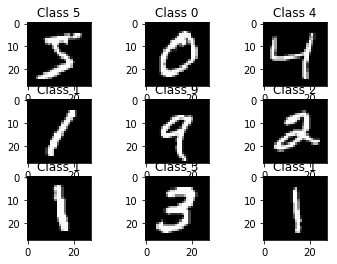

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Format data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network.

In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
 
# Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dropout(0.2))   

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

## Visualize the network

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

## Compile the model
Keras is using TensorFlow as a backend. 

When compiling a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical crossentropy*, and is a loss function well-suited to comparing two probability distributions.

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

## Train Model
Feed the training data loaded in earlier into this model and it will learn to classify digits

In [9]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.2516 - val_loss: 0.1116
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.1015 - val_loss: 0.0867
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0720 - val_loss: 0.0714
Epoch 4/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0551 - val_loss: 0.0783
Epoch 5/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0454 - val_loss: 0.0702
Epoch 6/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0387 - val_loss: 0.0645
Epoch 7/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0340 - val_loss: 0.0610
Epoch 8/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0306 - val_loss: 0.0598
Epoch 9/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0269 - val_loss: 0.0652
Epoch

## Evaluate performance

In [10]:
score = model.evaluate(X_test, Y_test,verbose=1)

print('Test loss:', score)

10000/10000 [==============================] - 1s 72us/step
Test loss: 0.06770308801803471


## Plot the loss curve

Text(0.5, 1.0, 'Loss Curves')

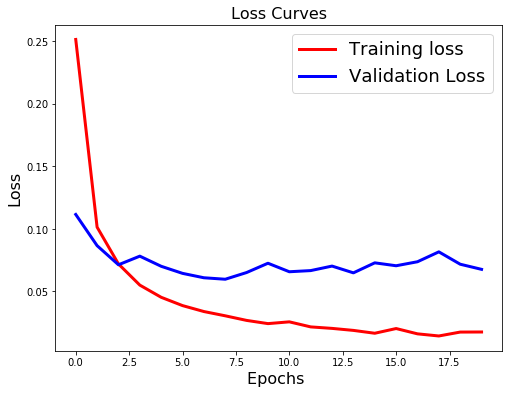

In [11]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

## Inspect the output

Inspect the output and look at some examples it gets right, and some examples it gets wrong. The predict_classes function outputs the highest probability class according to the trained classifier for each input example.

In [12]:
predicted_classes = model.predict_classes(X_test)
#print(predicted_classes)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print(correct_indices)
print(incorrect_indices)

[   0    1    2 ... 9997 9998 9999]
[  92  115  149  247  321  340  445  449  495  582  691  720  839  951
  956 1014 1039 1112 1156 1192 1226 1232 1242 1247 1260 1319 1328 1393
 1395 1522 1530 1549 1569 1609 1681 1754 1774 1790 1800 1901 1941 2024
 2070 2098 2109 2118 2135 2182 2224 2272 2280 2293 2387 2405 2408 2414
 2447 2462 2488 2597 2607 2635 2654 2720 2721 2758 2863 2921 2939 2953
 3030 3073 3289 3333 3375 3422 3475 3503 3520 3558 3776 3808 3818 3853
 3869 3893 3906 3941 3976 4027 4176 4199 4248 4289 4306 4437 4443 4497
 4500 4536 4547 4551 4571 4635 4639 4731 4740 4761 4807 4814 4880 4890
 4956 4966 5086 5265 5450 5586 5600 5649 5676 5734 5936 5937 5955 5973
 6023 6421 6532 6571 6597 6625 6641 6783 6847 6926 7552 7823 7886 7921
 8246 8277 8311 8325 8527 9009 9024 9280 9587 9634 9664 9679 9700 9729
 9745 9768 9770 9940 9944]


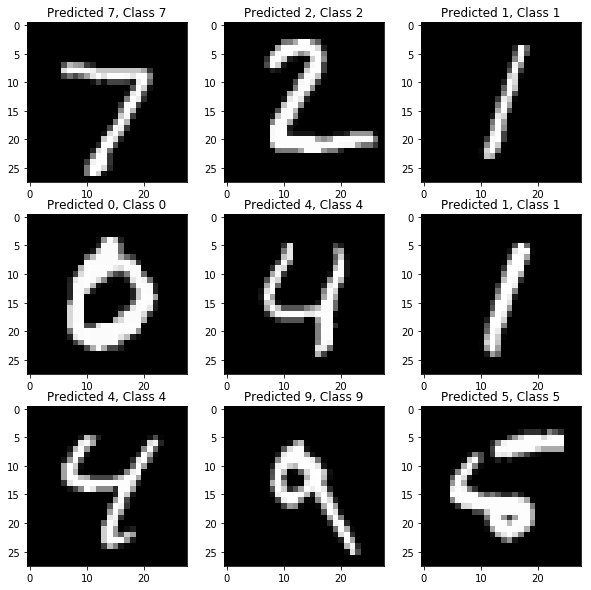

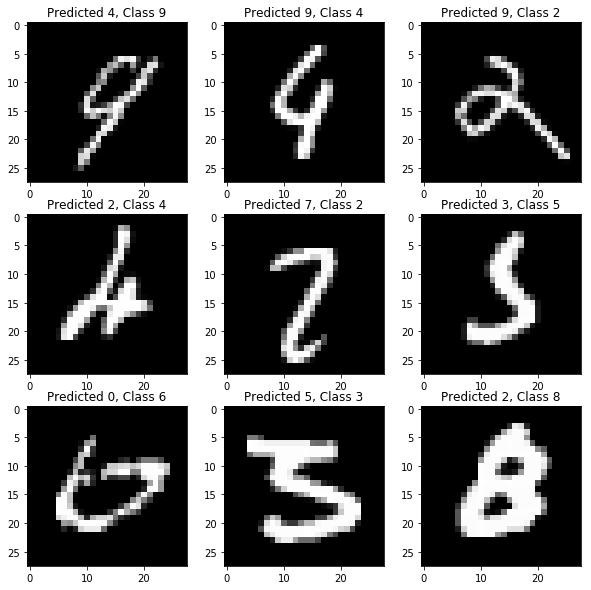

In [13]:
#some of the correct results
plt.figure(figsize=(10,10))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
#some of the incorrect predictions
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))